Based on [A Guide to Time Series Forecasting with ARIMA in Python 3](https://www.digitalocean.com/community/tutorials/a-guide-to-time-series-forecasting-with-arima-in-python-3)

In [6]:
import warnings
import itertools
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [7]:
data = sm.datasets.co2.load_pandas()
y = data.data

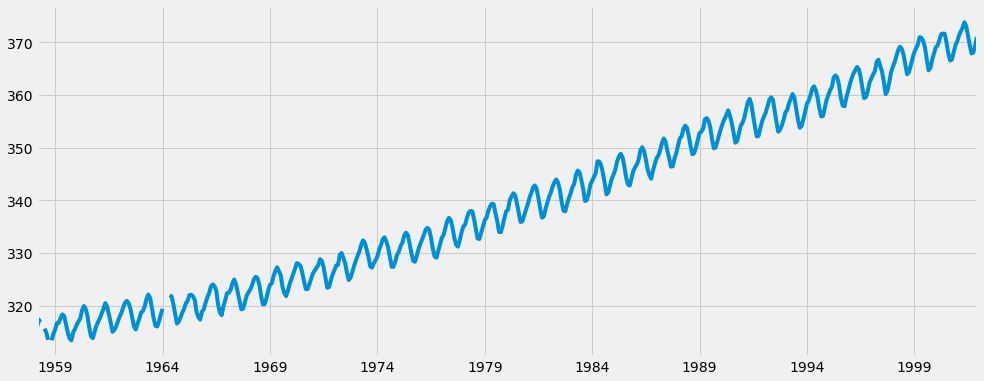

In [20]:
y.plot(figsize=(15,6))
plt.show()


In [22]:
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [23]:
warnings.filterwarnings("ignore")
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:6755.420874928783
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:1560.637260004153
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:1079.1960569445455
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1044.2875157622807
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:1329.6386950840374
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:1022.8941280170046
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:6824.789552501165
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:6046.5322791509825
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:1382.0015531310698
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:1210.2784259149657
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:777.9316148324062
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:763.8826453481643
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:1093.849404880927
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:779.1342457726662
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1209.8662117847941
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:277.20718391405046
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:557.4612139914224
ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:318.5375391446085
A

In [24]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1297      0.122      1.059      0.290      -0.110       0.370
ma.L1         -0.4792      0.111     -4.333      0.000      -0.696      -0.262
ar.S.L12       0.0014      0.002      0.926      0.355      -0.002       0.004
ma.S.L12      -0.8604      0.027    -31.681      0.000      -0.914      -0.807
sigma2         0.0860      0.006     15.404      0.000       0.075       0.097


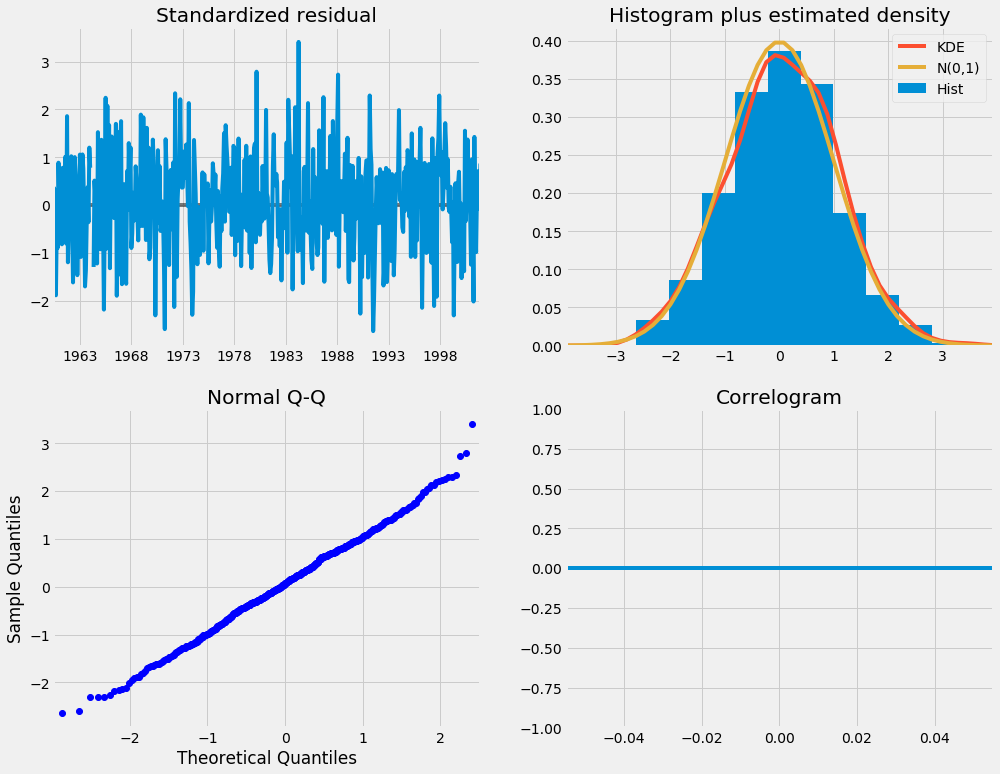

In [26]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

In [27]:
pred = results.get_prediction(start=pd.to_datetime('1998-01-01'), dynamic=False)
pred_ci = pred.conf_int()

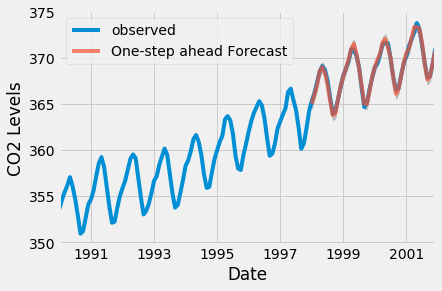

In [28]:
ax = y['1990':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('CO2 Levels')
plt.legend()

plt.show()

In [29]:
y_forecasted = pred.predicted_mean
y_truth = y['1998-01-01':]

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 0.07


In [30]:
pred_dynamic = results.get_prediction(start=pd.to_datetime('1998-01-01'), dynamic=True, full_results=True)
pred_dynamic_ci = pred_dynamic.conf_int()

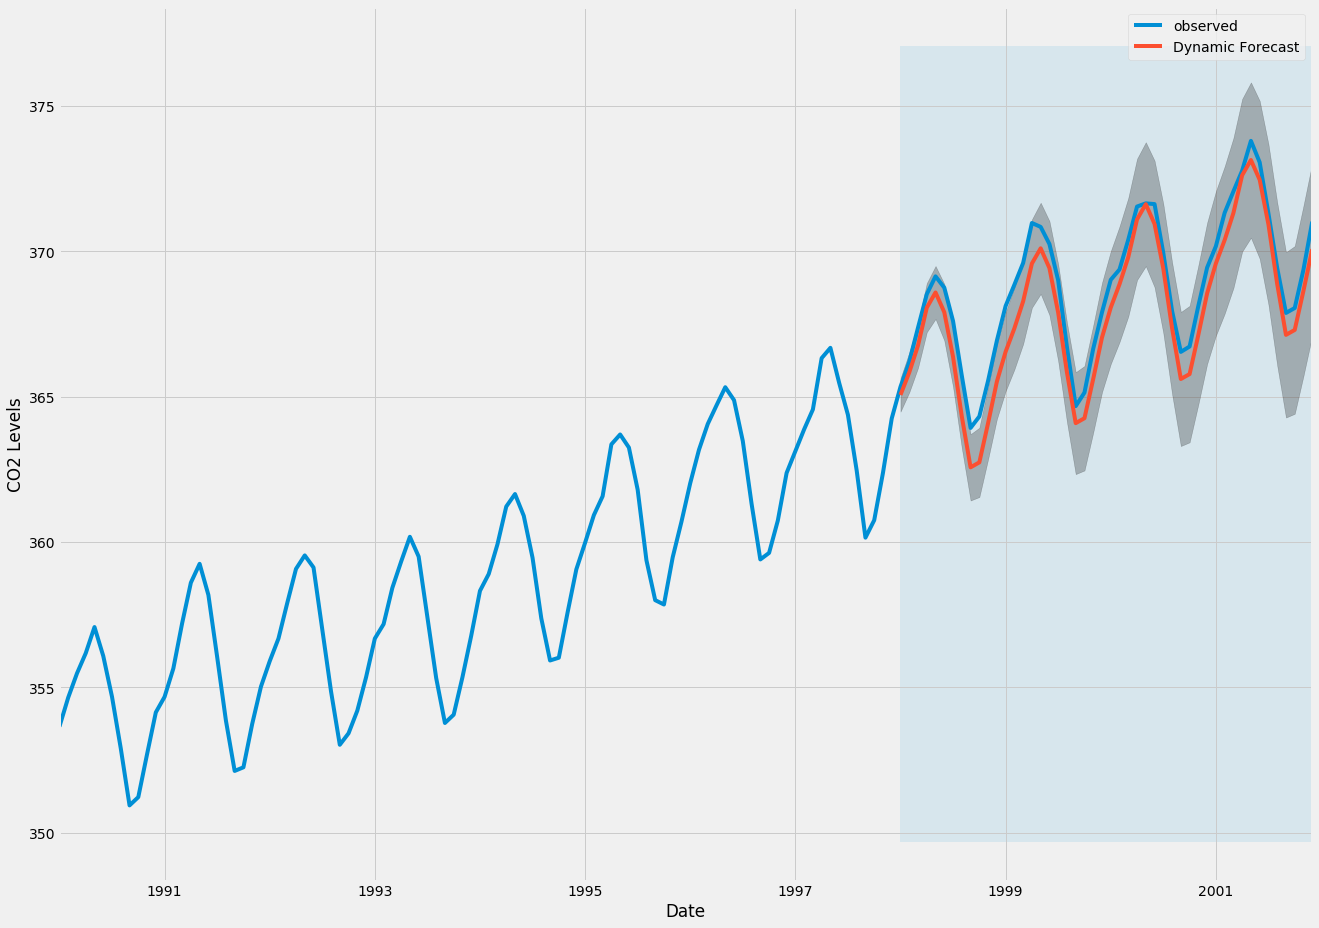

In [31]:
ax = y['1990':].plot(label='observed', figsize=(20, 15))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_ci.index,
                pred_dynamic_ci.iloc[:, 0],
                pred_dynamic_ci.iloc[:, 1], color='k', alpha=.25)

ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('1998-01-01'), y.index[-1],
                 alpha=.1, zorder=-1)

ax.set_xlabel('Date')
ax.set_ylabel('CO2 Levels')

plt.legend()
plt.show()

In [32]:
# Extract the predicted and true values of our time series
y_forecasted = pred_dynamic.predicted_mean
y_truth = y['1998-01-01':]

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 0.84


In [33]:
# Get forecast 500 steps ahead in future
pred_uc = results.get_forecast(steps=500)

# Get confidence intervals of forecasts
pred_ci = pred_uc.conf_int()

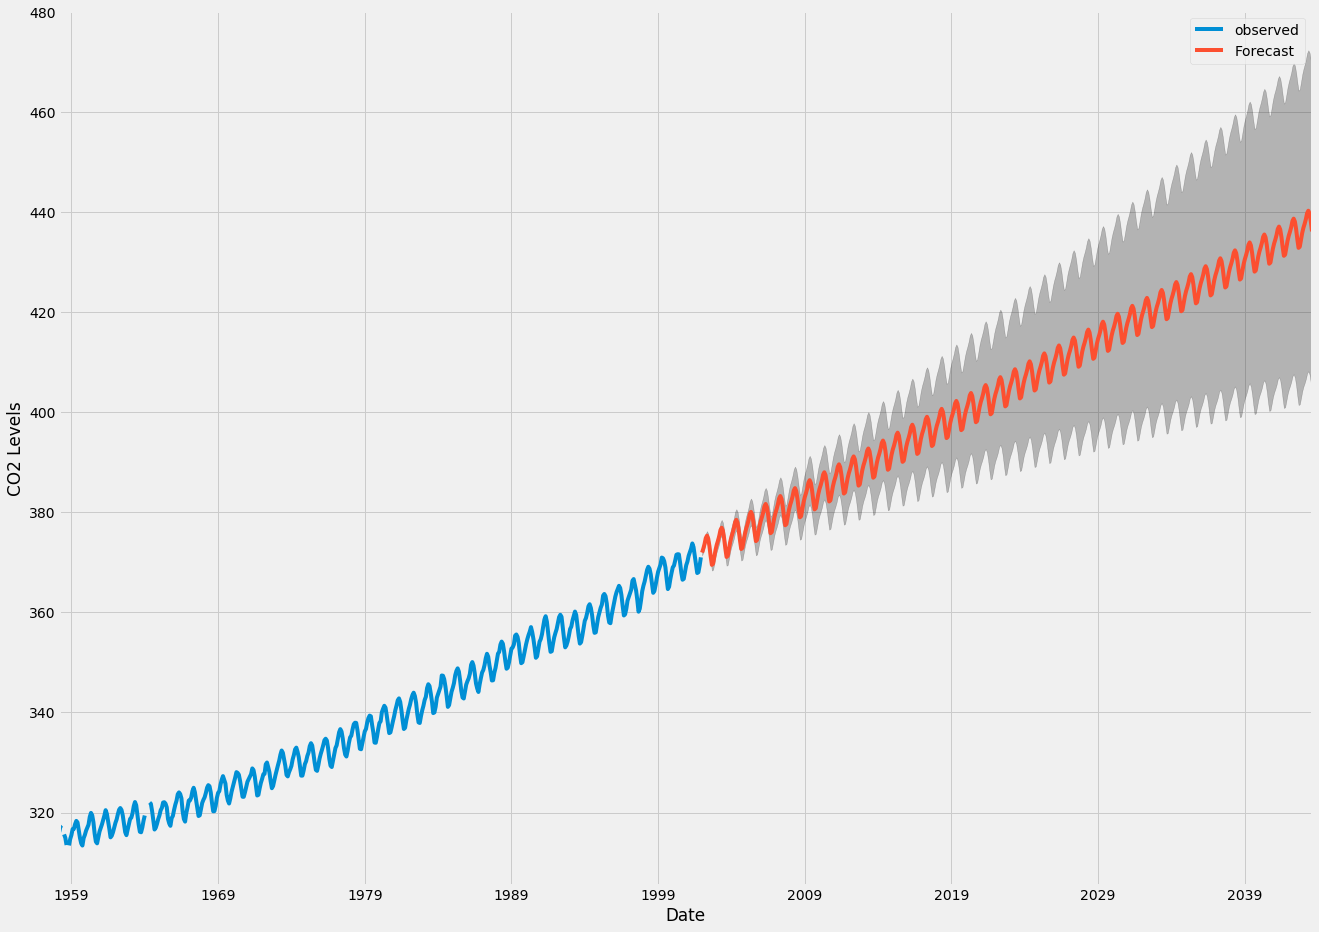

In [34]:
ax = y.plot(label='observed', figsize=(20, 15))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('CO2 Levels')

plt.legend()
plt.show()